
[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
         avg   Hori
0     21.595  19.05
1     21.600  19.05
2     21.600  19.05
3     21.595  19.07
4     21.600  19.07
...      ...    ...
4945  40.730  38.84
4946  40.730  38.84
4947  40.730  38.84
4948  40.730  38.84
4949  40.725  38.84

[4950 rows x 2 columns]
Index(['avg', 'Hori'], dtype='object')


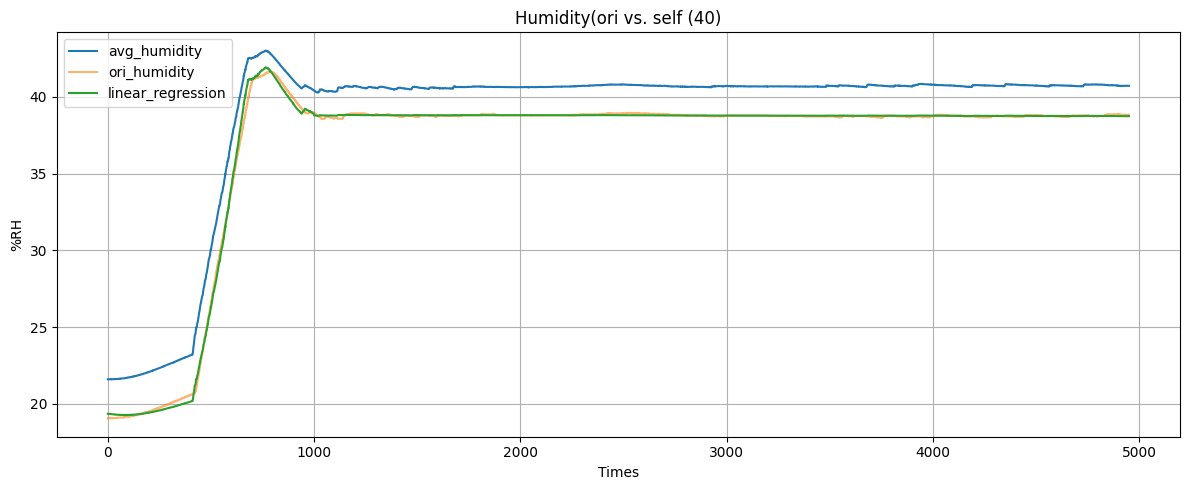

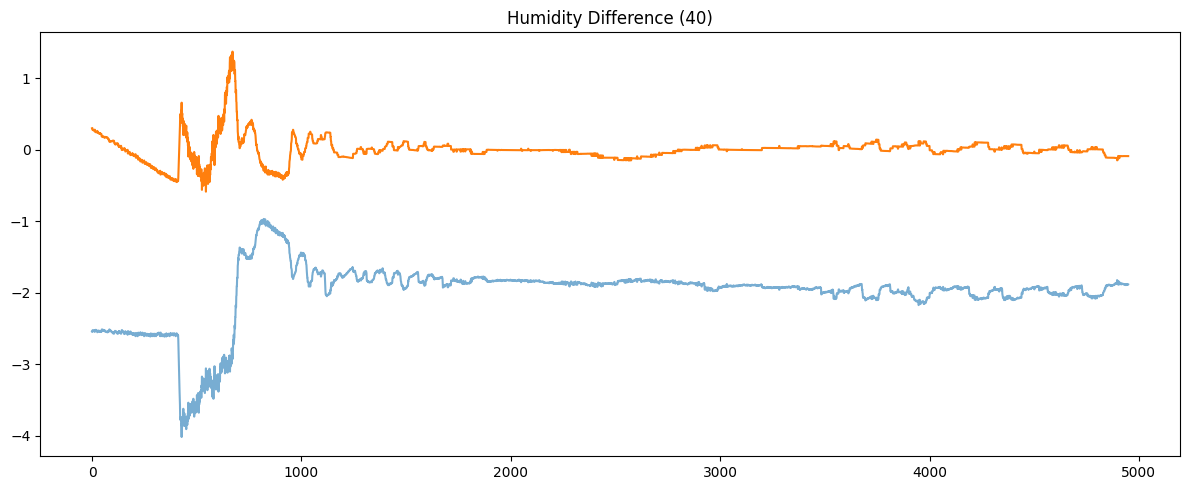

In [ ]:
!pip install openpyxl
import pandas as pd
import numpy as np

df_1 = pd.read_excel("40C_xlsx/40C40H.xlsx", sheet_name = "H", usecols = ["avg"])
df_2 = pd.read_excel("40C_xlsx/40C40H.xlsx", sheet_name = "Hori")
min_len = min(len(df_1), len(df_2))
df_1 = df_1.iloc[:min_len]
df_2 = df_2.iloc[:min_len]
dfs = pd.concat([df_1, df_2], axis=1)

diff = dfs["Hori"] - dfs["avg"]

print(dfs)
print(dfs.columns)
x = dfs["avg"].to_numpy()
y = dfs["Hori"].to_numpy()

k = 1000
coeffs_front = np.polyfit(x[:k], y[:k], 2)
fit_front = np.polyval(coeffs_front, x[:k])

coeffs_back = np.polyfit(x[k:], y[k:], 1)
fit_back = np.polyval(coeffs_back, x[k:])

dfs["new"] = np.concatenate([fit_front, fit_back])
n = dfs.index.to_numpy()
res = dfs["Hori"] - dfs["new"]

coeffs_res_front = np.polyfit(n[:k], res[:k], 2)
trend_front = np.polyval(coeffs_res_front, n[:k])
coeffs_res_back = np.polyfit(n[k:], res[k:], 1)
trend_back = np.polyval(coeffs_res_back, n[k:])
trend = np.concatenate([trend_front, trend_back])
dfs["twice"] = dfs["new"] + trend
res_after = dfs["twice"] - dfs["Hori"]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df_1, label= "avg_humidity")
plt.plot(df_2, label= "ori_humidity", alpha=0.6)
plt.plot(dfs["twice"], label = "linear_regression")
plt.legend(); plt.grid(True); plt.xlabel("Times"); plt.ylabel("%RH")
plt.title("Humidity(ori vs. self (40)"); plt.tight_layout()
plt.savefig("初始对比图.png")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(diff, alpha = 0.6)
plt.plot(res_after)
plt.title("Humidity Difference (40)"); plt.tight_layout()
plt.savefig("Difference.png")
plt.show()


In [ ]:
n = dfs.index.to_numpy()

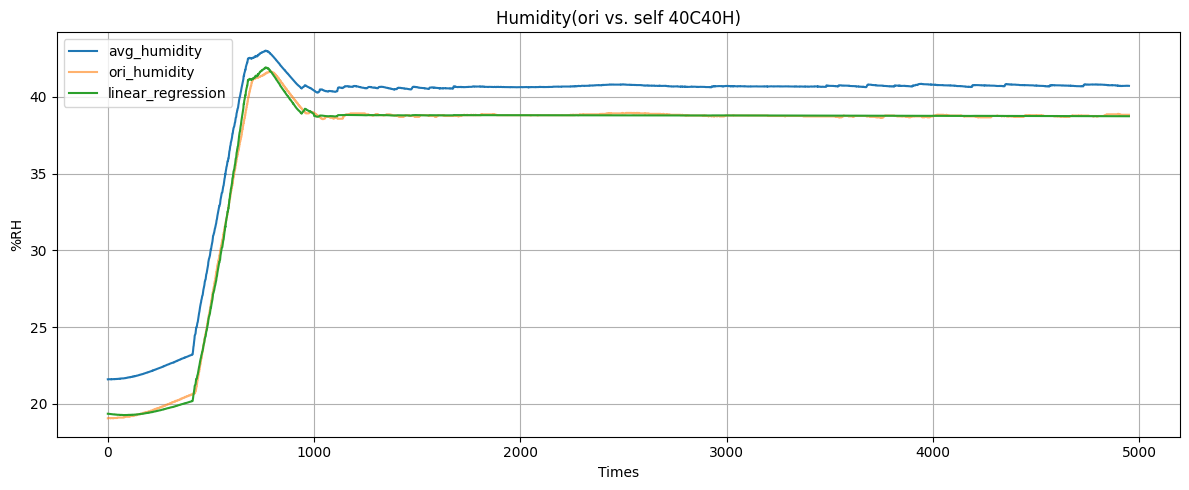

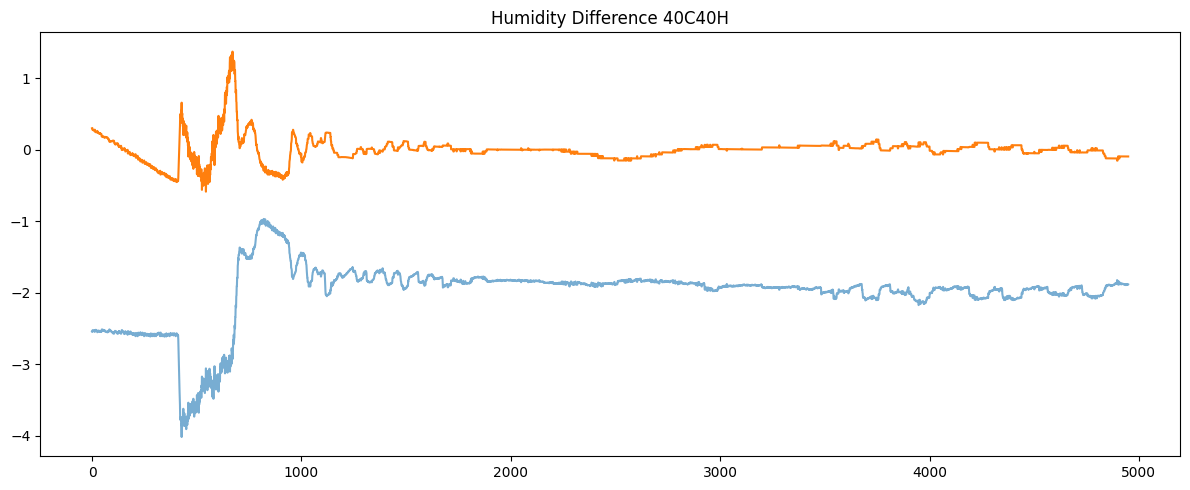

         avg   Hori        new      twice
0     21.595  19.05  19.136312  19.349712
1     21.600  19.05  19.140000  19.351530
2     21.600  19.05  19.140000  19.349664
3     21.595  19.07  19.136312  19.344115
4     21.600  19.07  19.140000  19.345946
...      ...    ...        ...        ...
4945  40.730  38.84  38.794836  38.744324
4946  40.730  38.84  38.794836  38.744291
4947  40.730  38.84  38.794836  38.744257
4948  40.730  38.84  38.794836  38.744223
4949  40.725  38.84  38.794654  38.744007

[4950 rows x 4 columns]


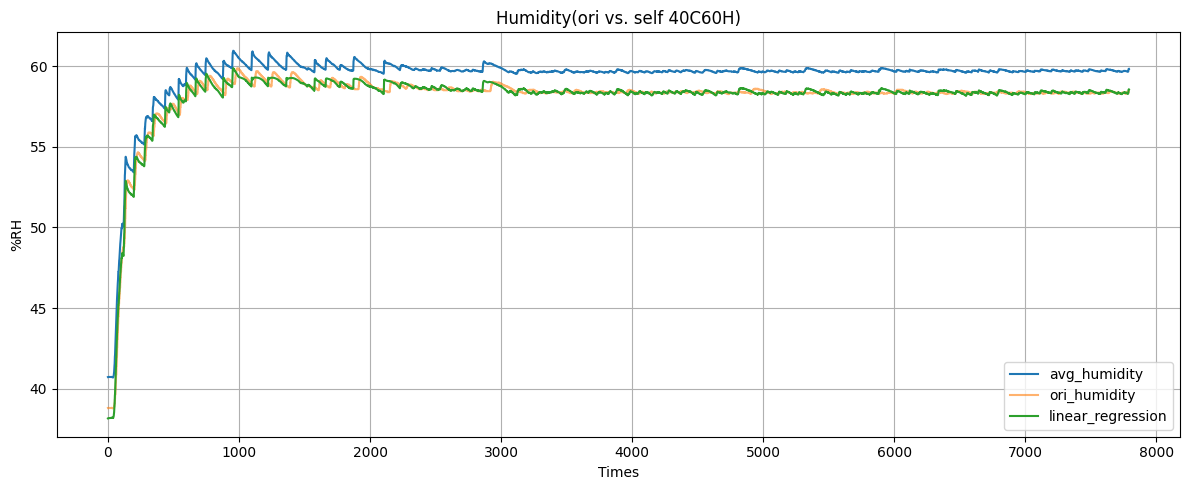

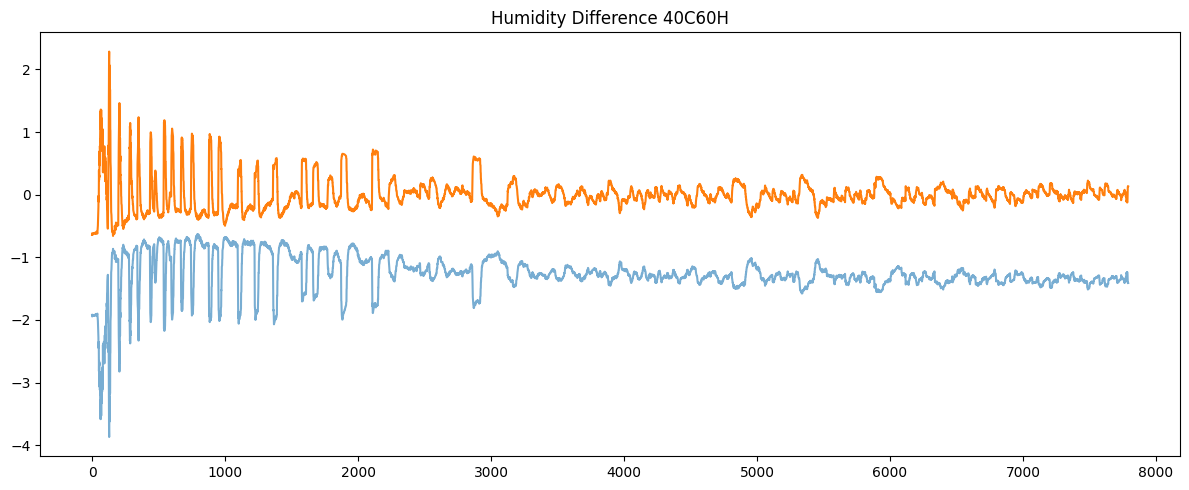

         avg   Hori        new      twice
0     40.730  38.81  38.355785  38.168032
1     40.735  38.79  38.361100  38.174484
2     40.730  38.79  38.355785  38.170305
3     40.730  38.81  38.355785  38.171437
4     40.735  38.81  38.361100  38.177883
...      ...    ...        ...        ...
7787  59.770  58.42  58.546195  58.467267
7788  59.825  58.42  58.622234  58.543326
7789  59.830  58.42  58.628861  58.549974
7790  59.825  58.42  58.622234  58.543368
7791  59.830  58.42  58.628861  58.550015

[7792 rows x 4 columns]


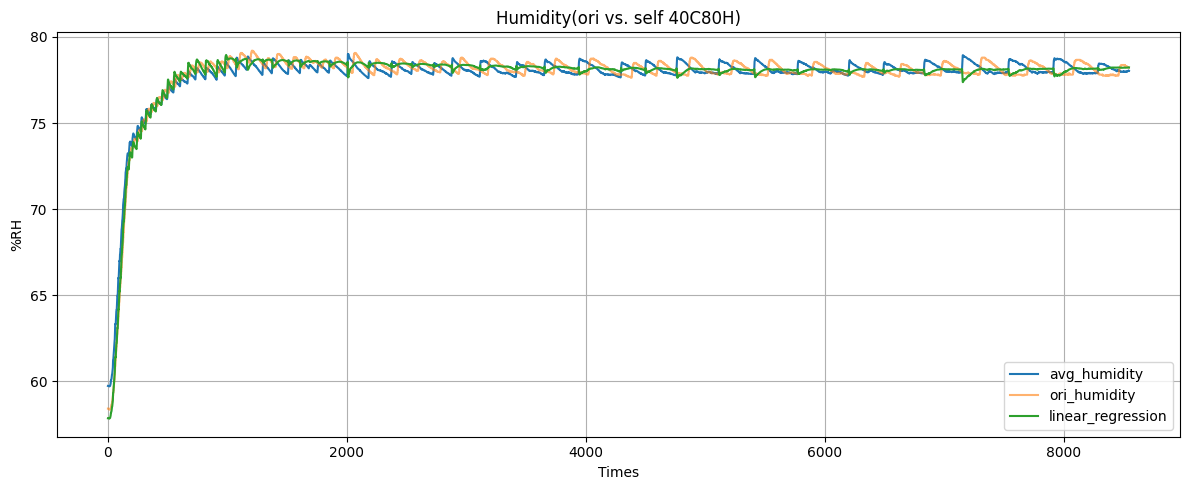

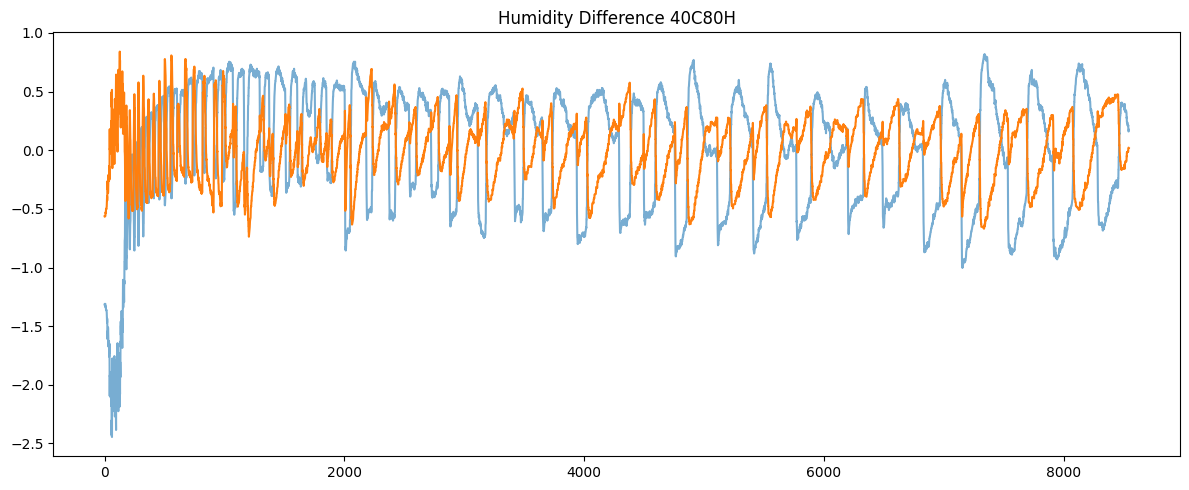

         avg   Hori        new      twice
0     59.735  58.42  57.993409  57.856986
1     59.730  58.42  57.988747  57.853327
2     59.730  58.42  57.988747  57.854328
3     59.730  58.42  57.988747  57.855327
4     59.730  58.42  57.988747  57.856323
...      ...    ...        ...        ...
8540  78.030  78.21  78.278897  78.228724
8541  78.035  78.21  78.279817  78.229745
8542  78.050  78.21  78.282241  78.232269
8543  78.045  78.21  78.281489  78.231618
8544  78.035  78.21  78.279817  78.230046

[8545 rows x 4 columns]


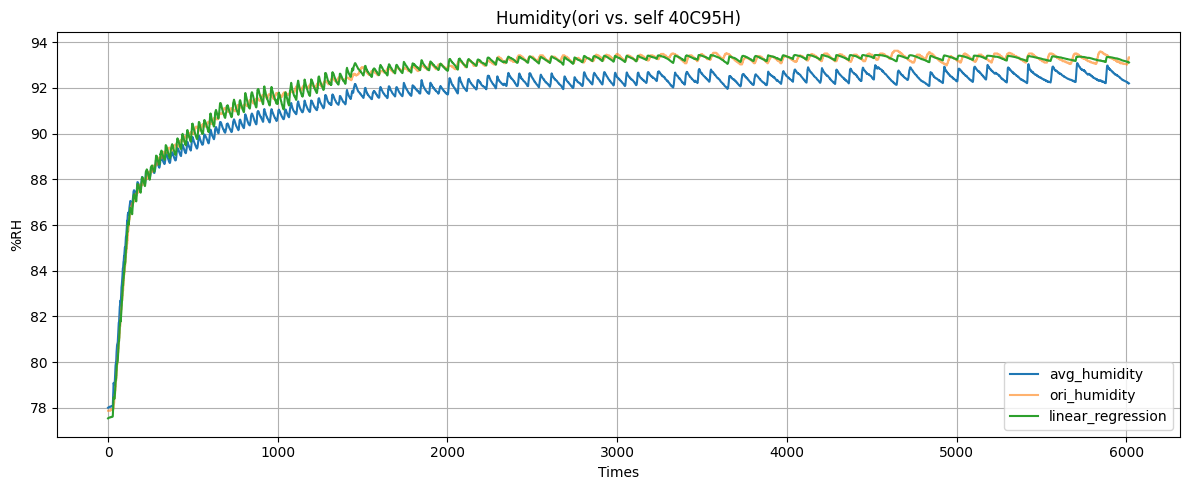

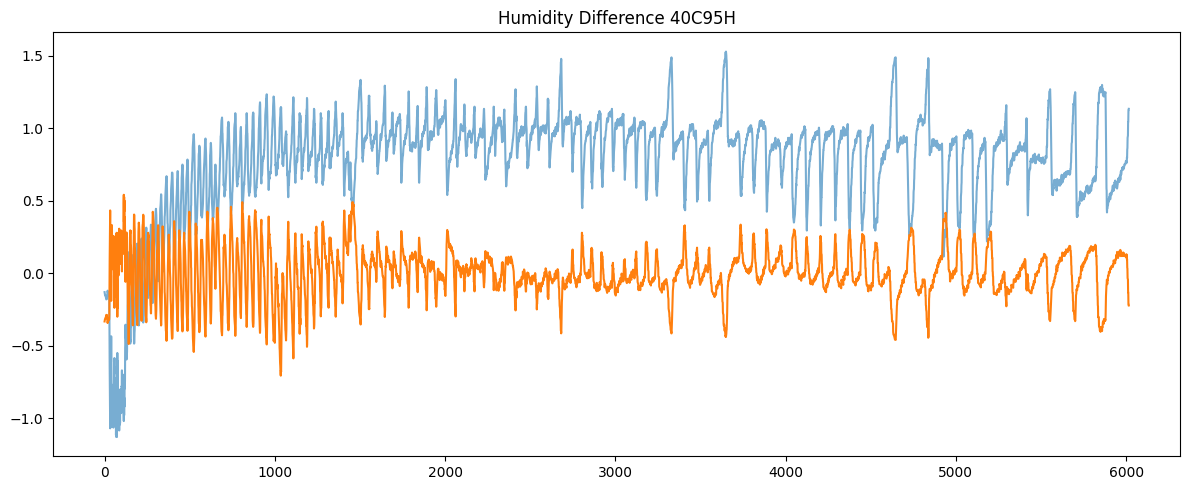

         avg   Hori        new      twice
0     78.010  77.88  77.643990  77.547387
1     78.020  77.88  77.651994  77.555901
2     78.025  77.88  77.655998  77.560415
3     78.030  77.88  77.660004  77.564929
4     78.030  77.88  77.660004  77.565436
...      ...    ...        ...        ...
6012  92.195  93.24  93.167471  93.108382
6013  92.195  93.24  93.167471  93.108283
6014  92.205  93.33  93.173533  93.114245
6015  92.205  93.33  93.173533  93.114145
6016  92.195  93.33  93.167471  93.107984

[6017 rows x 4 columns]


In [3]:
import pandas as pd
import numpy as np

def read_xlsx_and_plot(csv_path, label):
    df_1 = pd.read_excel(csv_path, sheet_name = "H")
    df_1.columns = df_1.columns.str.lower() 
    df_1 = df_1[["avg"]]
    df_2 = pd.read_excel(csv_path, sheet_name = "Hori")
    dfs = [df_1, df_2]
    min_len = min(len(df_1), len(df_2))
    df_1 = df_1.iloc[:min_len]
    df_2 = df_2.iloc[:min_len]
    dfs = pd.concat([df_1, df_2], axis=1)
    diff = dfs["Hori"] - dfs["avg"]

    x = dfs["avg"].to_numpy()
    y = dfs["Hori"].to_numpy()

    k = 1000
    coeffs_front = np.polyfit(x[:k], y[:k], 2)
    fit_front = np.polyval(coeffs_front, x[:k])
    coeffs_back = np.polyfit(x[k:], y[k:], 2)
    fit_back = np.polyval(coeffs_back, x[k:])
    dfs["new"] = np.concatenate([fit_front, fit_back])
    
    n = dfs.index.to_numpy()
    res = dfs["Hori"] - dfs["new"]
    coeffs_res_front = np.polyfit(n[:k], res[:k], 2)
    trend_front = np.polyval(coeffs_res_front, n[:k])
    coeffs_res_back = np.polyfit(n[k:], res[k:], 2)
    trend_back = np.polyval(coeffs_res_back, n[k:])
    trend = np.concatenate([trend_front, trend_back])
    dfs["twice"] = dfs["new"] + trend
    res_after = dfs["twice"] - dfs["Hori"]
    

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,5))
    plt.plot(df_1, label= "avg_humidity")
    plt.plot(df_2, label= "ori_humidity", alpha=0.6)
    plt.plot(dfs["twice"], label = "linear_regression")
    plt.legend(); plt.grid(True); plt.xlabel("Times"); plt.ylabel("%RH")
    plt.title(f"Humidity(ori vs. self {label})"); plt.tight_layout()
    plt.savefig(f"初始对比图 {label}.png")
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.plot(diff, alpha = 0.6)
    plt.plot(res_after)
    plt.title(f"Humidity Difference {label}"); plt.tight_layout()
    plt.savefig(f"Difference {label}.png")
    plt.show()
    return dfs

print(read_xlsx_and_plot("40C_xlsx/40C40H.xlsx", label = "40C40H"))
print(read_xlsx_and_plot("40C_xlsx/40C60H.xlsx", label = "40C60H"))
print(read_xlsx_and_plot("40C_xlsx/40C80H.xlsx", label = "40C80H"))
print(read_xlsx_and_plot("40C_xlsx/40C95H.xlsx", label = "40C95H"))




    

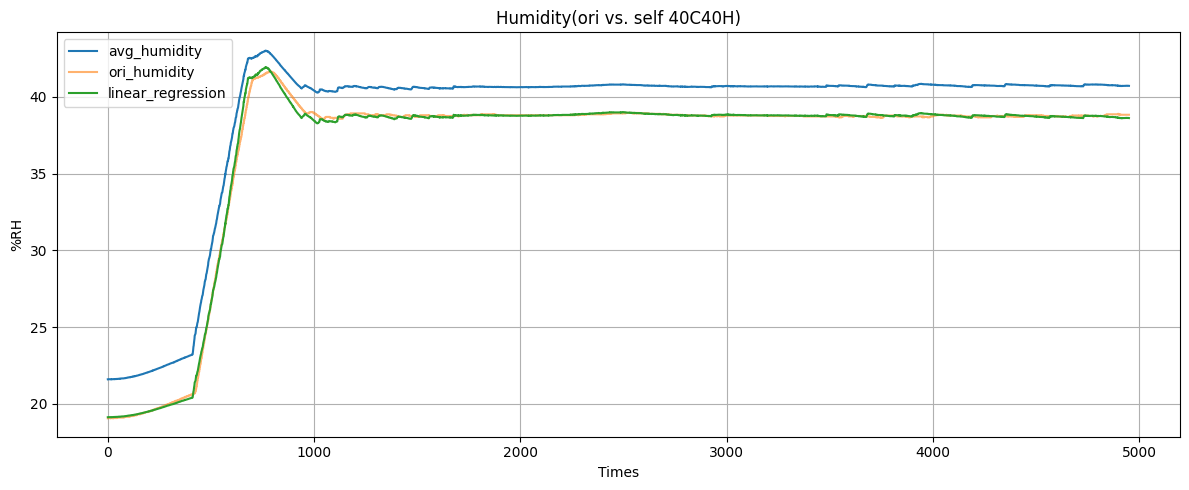

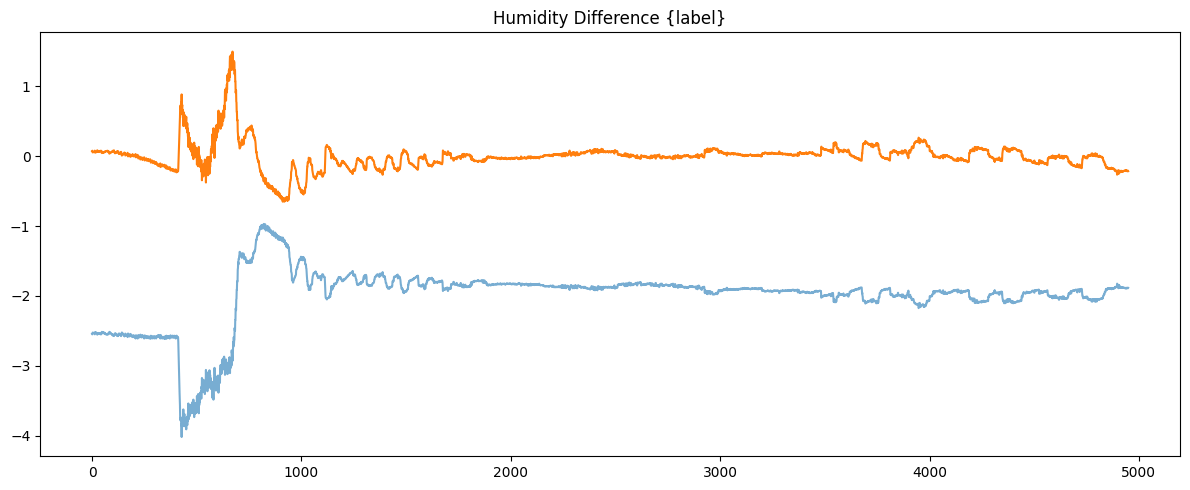

         avg   Hori        new      twice
0     21.595  19.05  19.136312  19.123666
1     21.600  19.05  19.140000  19.127482
2     21.600  19.05  19.140000  19.127610
3     21.595  19.07  19.136312  19.124051
4     21.600  19.07  19.140000  19.127866
...      ...    ...        ...        ...
4945  40.730  38.84  38.780155  38.632494
4946  40.730  38.84  38.780155  38.632311
4947  40.730  38.84  38.780155  38.632128
4948  40.730  38.84  38.780155  38.631945
4949  40.725  38.84  38.773577  38.625184

[4950 rows x 4 columns]


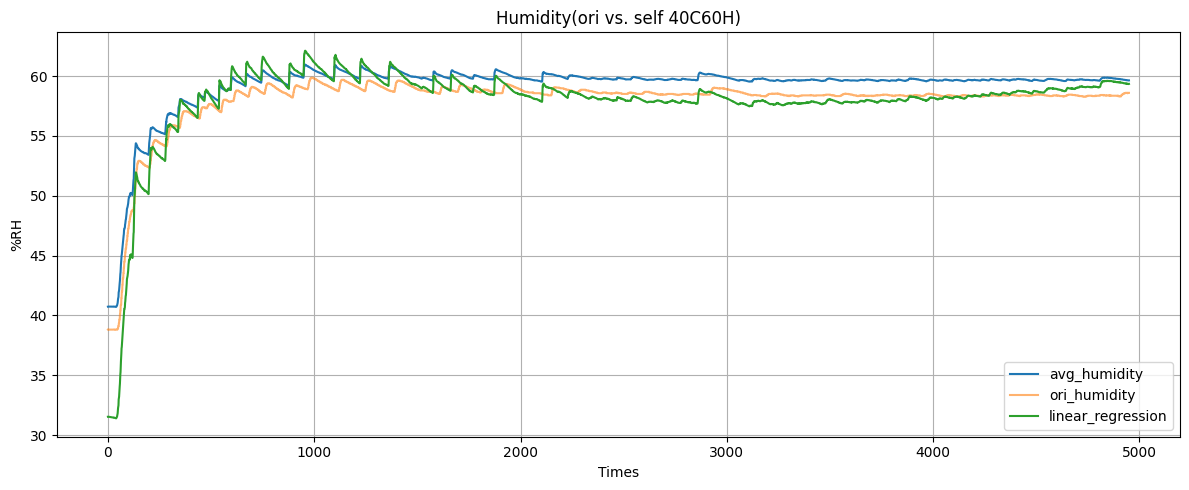

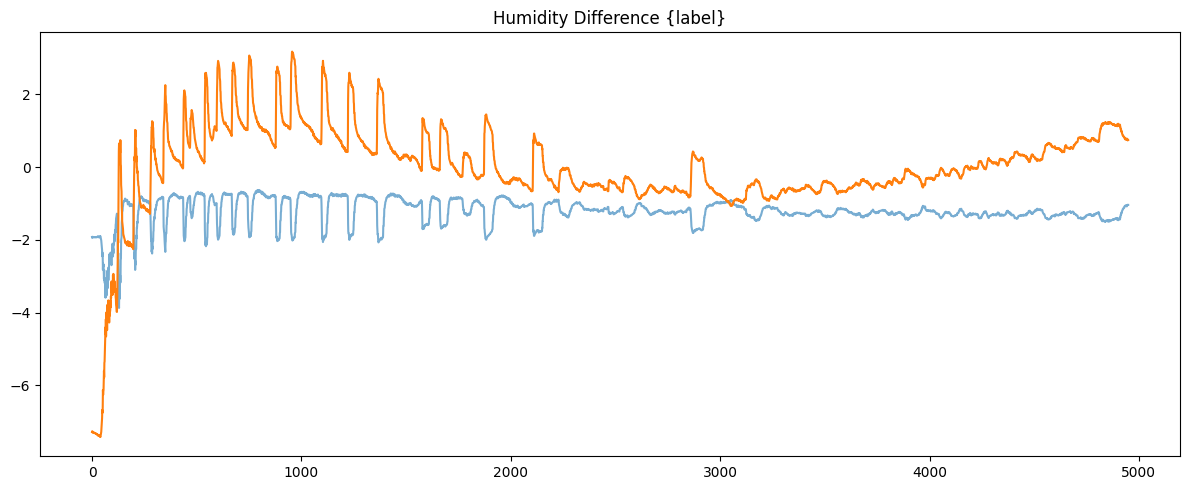

         avg   Hori        new      twice
0     40.730  38.81  38.780155  31.529522
1     40.735  38.79  38.786734  31.533358
2     40.730  38.79  38.780155  31.524037
3     40.730  38.81  38.780155  31.521296
4     40.735  38.81  38.786734  31.525136
...      ...    ...        ...        ...
4945  59.640  58.60  69.063013  59.339563
4946  59.645  58.60  69.072449  59.350742
4947  59.635  58.60  69.053577  59.333615
4948  59.640  58.60  69.063013  59.344796
4949  59.640  58.60  69.063013  59.346542

[4950 rows x 4 columns]


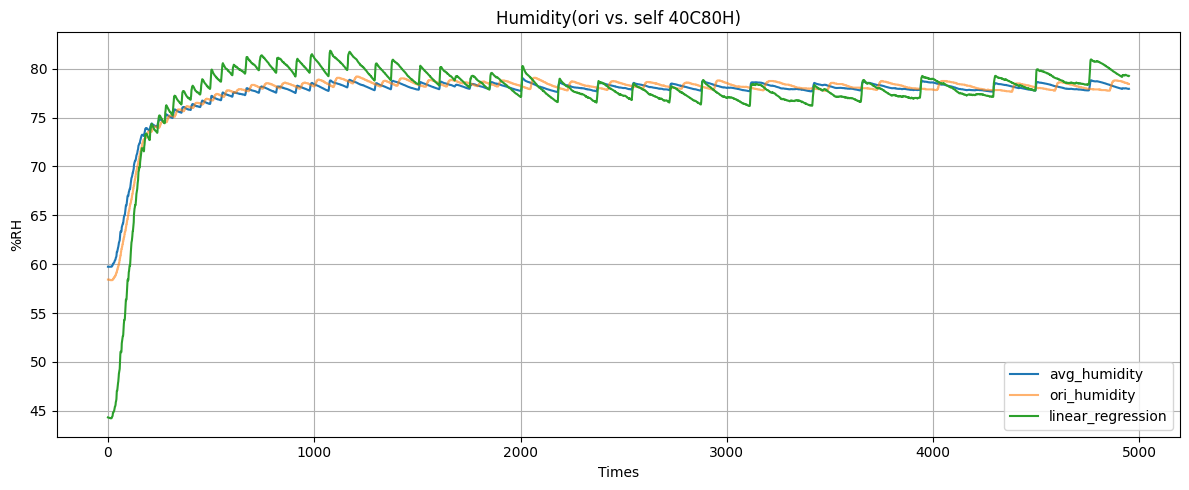

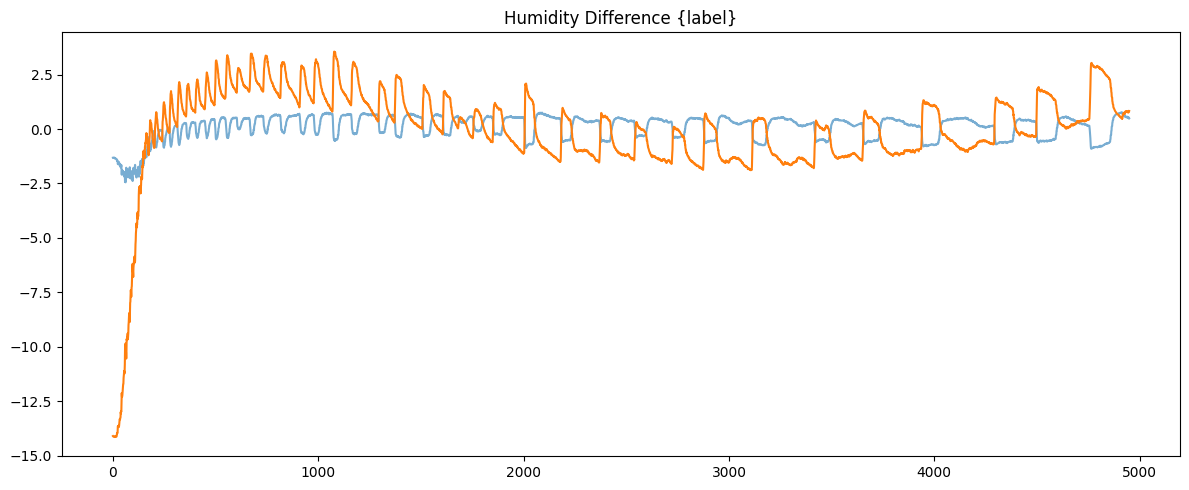

         avg   Hori         new      twice
0     59.735  58.42   69.242427  44.316906
1     59.730  58.42   69.232977  44.302962
2     59.730  58.42   69.232977  44.298468
3     59.730  58.42   69.232977  44.293976
4     59.730  58.42   69.232977  44.289486
...      ...    ...         ...        ...
4945  77.935  78.49  108.645281  79.249689
4946  77.935  78.43  108.645281  79.252378
4947  77.930  78.43  108.633081  79.242868
4948  77.925  78.43  108.620883  79.233361
4949  77.935  78.43  108.645281  79.260452

[4950 rows x 4 columns]


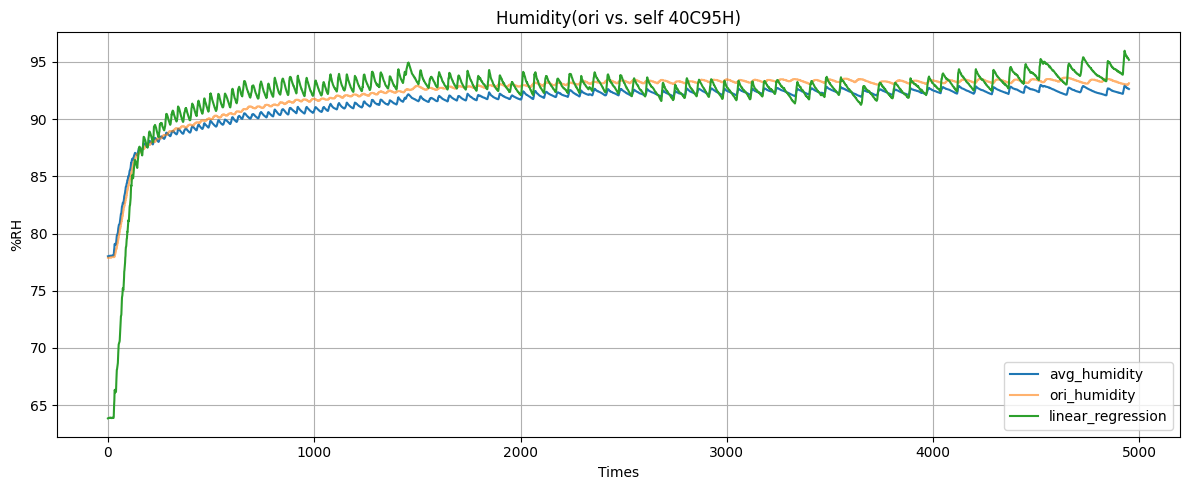

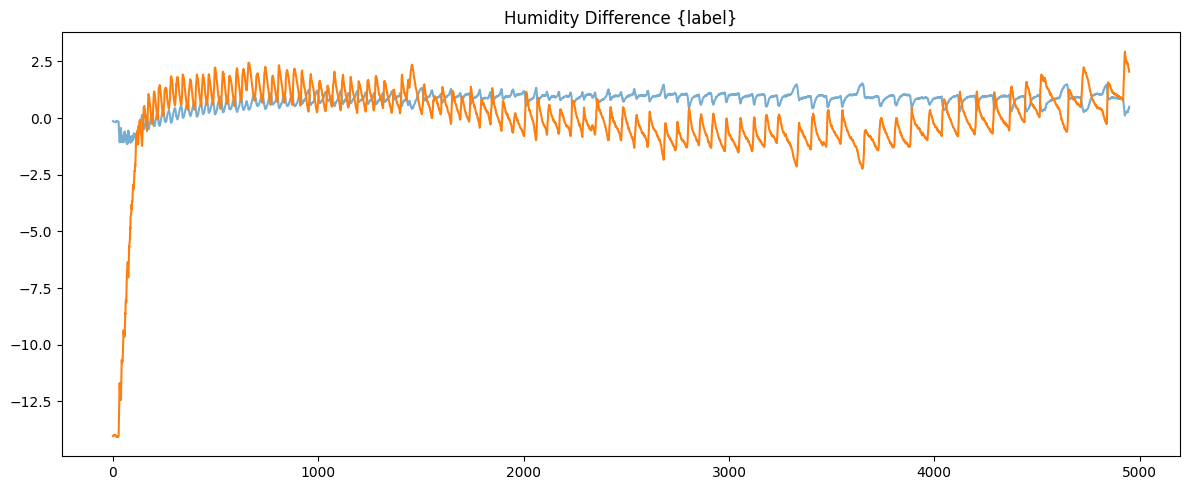

         avg   Hori         new      twice
0     78.010  77.88  108.828364  63.846930
1     78.020  77.88  108.852788  63.865668
2     78.025  77.88  108.865001  63.872197
3     78.030  77.88  108.877215  63.878729
4     78.030  77.88  108.877215  63.873048
...      ...    ...         ...        ...
4945  92.675  93.04  147.893298  95.298057
4946  92.660  93.07  147.850021  95.257387
4947  92.655  93.07  147.835596  95.245572
4948  92.645  93.07  147.806750  95.219337
4949  92.630  93.13  147.763486  95.178686

[4950 rows x 4 columns]


In [23]:
def read_xlsx_and_plot(csv_path, label):
    df_1 = pd.read_excel(csv_path, sheet_name = "H")
    df_1.columns = df_1.columns.str.lower() 
    df_1 = df_1[["avg"]]
    df_2 = pd.read_excel(csv_path, sheet_name = "Hori")
    dfs = [df_1, df_2]
    df_1 = df_1.iloc[:min_len]
    df_2 = df_2.iloc[:min_len]
    dfs = pd.concat([df_1, df_2], axis=1)
    diff = dfs["Hori"] - dfs["avg"]

    x = dfs["avg"].to_numpy()
    y = dfs["Hori"].to_numpy()
    coeffs = np.polyfit(x, y, 2)
    dfs["new"] = np.polyval(coeffs_front, x)

    n = dfs.index.to_numpy()
    res = dfs["Hori"] - dfs["new"]
    coeffs_res_front = np.polyfit(n, res, 2)
    trend = np.polyval(coeffs_res_front, n)
    dfs["twice"] = dfs["new"] + trend
    res_after = dfs["twice"] - dfs["Hori"]
    

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,5))
    plt.plot(df_1, label= "avg_humidity")
    plt.plot(df_2, label= "ori_humidity", alpha=0.6)
    plt.plot(dfs["twice"], label = "linear_regression")
    plt.legend(); plt.grid(True); plt.xlabel("Times"); plt.ylabel("%RH")
    plt.title(f"Humidity(ori vs. self {label})"); plt.tight_layout()
    plt.savefig(f"初始对比图 {label}.png")
    plt.show()
    
    plt.figure(figsize=(12,5))
    plt.plot(diff, alpha = 0.6)
    plt.plot(res_after)
    plt.title("Humidity Difference {label}"); plt.tight_layout()
    plt.savefig(f"Difference {label}.png")
    plt.show()
    return dfs

print(read_xlsx_and_plot("40C_xlsx/40C40H.xlsx", label = "40C40H"))
print(read_xlsx_and_plot("40C_xlsx/40C60H.xlsx", label = "40C60H"))
print(read_xlsx_and_plot("40C_xlsx/40C80H.xlsx", label = "40C80H"))
print(read_xlsx_and_plot("40C_xlsx/40C95H.xlsx", label = "40C95H"))




    